In [ ]:
#! pip install hmmlearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import itertools
from sklearn.cluster import KMeans
from hmmlearn import hmm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [18]:
data = pd.read_csv(r'/content/dataset_B_05_2020 (1).csv')
x = data.drop(columns=['url', 'status']).values
y = data.iloc[:, -1].values
#y = y.reshape(-1, 1)
#encoder = OrdinalEncoder()
# transform data
#y = encoder.fit_transform(y)
#x = encoder.fit_transform(x)
print(x)

[[ 37.  19.   0. ...   1.   1.   4.]
 [ 77.  23.   1. ...   0.   1.   2.]
 [126.  50.   1. ...   0.   1.   0.]
 ...
 [105.  16.   1. ...   0.   1.  10.]
 [ 38.  30.   0. ...   0.   0.   4.]
 [477.  14.   1. ...   1.   1.   0.]]


In [21]:
# Implementation of the markov model
markov = hmm.GaussianHMM(n_components = 3, covariance_type = "diag", n_iter = 50, random_state = 42)
markov.fit(x)

GaussianHMM(n_components=3, n_iter=50, random_state=42)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [23]:
#SVM MODEL

model_svm = SVC(random_state=1)
model_svm.fit(x_train, y_train)
y_pred_svm = model_svm.predict(x_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

  legitimate       0.73      0.29      0.42      1747
    phishing       0.55      0.88      0.68      1682

    accuracy                           0.58      3429
   macro avg       0.64      0.59      0.55      3429
weighted avg       0.64      0.58      0.54      3429



0.5835520559930009

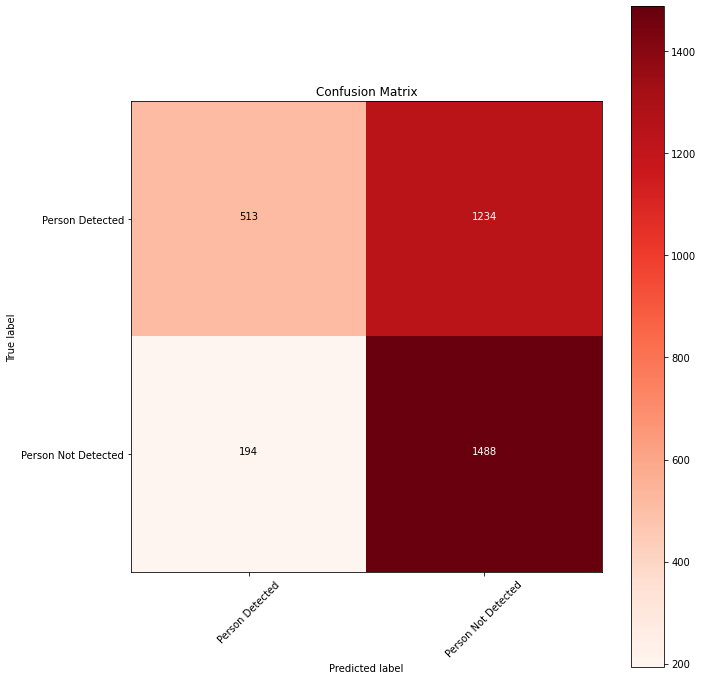

In [24]:
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Reds):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(y_test, y_pred_svm)
target_names = ["Person Detected", "Person Not Detected"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(y_test, y_pred_svm)


In [25]:
#KNN model

model_KNN = KNeighborsClassifier()
model_KNN.fit(x_train, y_train)
y_pred_KNN = model_KNN.predict(x_test)
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

  legitimate       0.86      0.81      0.83      1747
    phishing       0.81      0.86      0.84      1682

    accuracy                           0.83      3429
   macro avg       0.84      0.83      0.83      3429
weighted avg       0.84      0.83      0.83      3429



0.8343540390784485

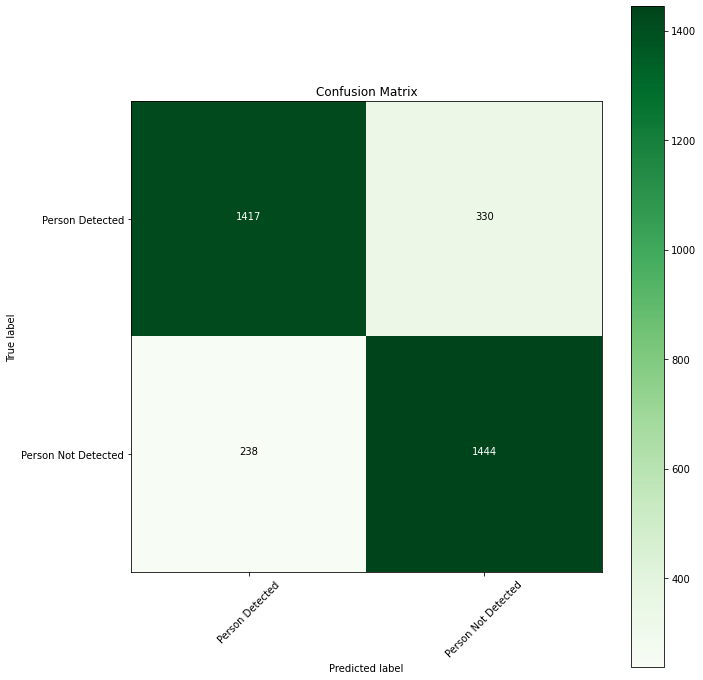

In [26]:
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Greens):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(y_test, y_pred_KNN)
target_names = ["Person Detected", "Person Not Detected"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(y_test, y_pred_KNN)